In [1]:
import os
import pandas as pd
import glob

def verificar_datos(dataset_base_path):
    dataset_dirs = sorted(glob.glob(os.path.join(dataset_base_path, 'dataset_*')))
    problemas = []

    for dataset_idx, dataset_dir in enumerate(dataset_dirs):
        labels_file = os.path.join(dataset_dir, 'labels.csv')
        if not os.path.exists(labels_file):
            print(f"Advertencia: No se encontró el archivo {labels_file}")
            continue

        labels_df = pd.read_csv(labels_file)
        for _, row in labels_df.iterrows():
            rgb_path = os.path.join(dataset_dir, 'imageRGB', row['image_rgb_name'])
            seg_path = os.path.join(dataset_dir, 'imageSEG', row['image_seg_name'])

            if not os.path.exists(rgb_path):
                problemas.append(f"Falta imagen RGB: {rgb_path}")

            if not os.path.exists(seg_path):
                problemas.append(f"Falta imagen SEG: {seg_path}")

    if problemas:
        print("Problemas encontrados:")
        for problema in problemas:
            print(problema)
    else:
        print("Todos los archivos están correctamente alineados.")

# Ejecutar verificación
verificar_datos('/home/canveo/carla_ws/dataset_CM_town02')

Todos los archivos están correctamente alineados.


In [6]:
# # Combinar los datasets en un solo archivo CSV
# def create_combined_dataset(dataset_base_path):
#     combined_data = []
#     dataset_dirs = sorted(glob.glob(os.path.join(dataset_base_path, 'dataset_*')))

#     for dataset_idx, dataset_dir in enumerate(dataset_dirs):
#         labels_file = os.path.join(dataset_dir, 'labels.csv')
        
#         if os.path.exists(labels_file):
#             labels_df = pd.read_csv(labels_file)
#             if not labels_df.empty:
#                 # Añadir las rutas completas para cada imagen
#                 labels_df['rgb_path'] = labels_df['image_rgb_name'].apply(
#                     lambda name: os.path.join(dataset_dir, 'imageRGB', name)
#                 )
#                 labels_df['seg_path'] = labels_df['image_seg_name'].apply(
#                     lambda name: os.path.join(dataset_dir, 'imageSEG', name)
#                 )

#                 # Seleccionar solo las columnas necesarias
#                 labels_df = labels_df[['rgb_path', 'seg_path', 'curvarade', 'steer', 'throttle', 'brake']]
#                 # labels_df = labels_df[['rgb_path', 'seg_path', 'steer', 'throttle', 'brake']]


#                 combined_data.append(labels_df)
#             else:
#                 print(f"Advertencia: El archivo {labels_file} está vacío.")
#         else:
#             print(f"Advertencia: No se encontró el archivo {labels_file}")

#     if combined_data:
#         # Concatenar todos los datos en un solo DataFrame
#         combined_df = pd.concat(combined_data, ignore_index=True)

#         # Guardar el DataFrame combinado en un CSV
#         combined_df.to_csv('combined_data.csv', index=False)
#         print(f"Total de filas combinadas: {len(combined_df)}")
#         print(combined_df.head())  # Muestra las primeras filas para revisión
#     else:
#         print("Error: No se encontraron datos para combinar.")
#         raise ValueError("No objects to concatenate")
import os
import glob
import pandas as pd

def create_combined_dataset(dataset_base_path, output_csv='dagger_dataset_raw_curvarade.csv'):
    combined_data = []
    dataset_dirs = sorted(glob.glob(os.path.join(dataset_base_path, 'dataset_*')))
    
    for dataset_dir in dataset_dirs:
        labels_file = os.path.join(dataset_dir, 'labels.csv')
        
        if os.path.exists(labels_file):
            labels_df = pd.read_csv(labels_file)
            if not labels_df.empty:
                # Ruta relativa desde el base_path
                rel_dataset_dir = os.path.relpath(dataset_dir, start=os.path.dirname(dataset_base_path))

                labels_df['seg_path'] = labels_df['image_seg_name'].apply(
                    lambda name: os.path.join(rel_dataset_dir, 'imageSEG', name)
                )
                # labels_df['seg_path'] = labels_df['image_seg_name'].apply(
                #     lambda name: os.path.join(rel_dataset_dir, 'imageSEG', name)
                # )

                labels_df = labels_df[['image_seg_name', 'curvature', 'steer', 'throttle', 'brake']] # 'curvarve'
                # labels_df = labels_df[['rgb_path', 'seg_path', 'steer', 'throttle', 'brake']]
                combined_data.append(labels_df)
            else:
                print(f"⚠️ Advertencia: El archivo {labels_file} está vacío.")
        else:
            print(f"⚠️ Advertencia: No se encontró el archivo {labels_file}")

    if combined_data:
        combined_df = pd.concat(combined_data, ignore_index=True)
        combined_df.to_csv(output_csv, index=False)
        print(f"✅ CSV combinado guardado en {output_csv} con {len(combined_df)} filas")
    else:
        raise ValueError("❌ No se encontraron datos para combinar.")


In [7]:
dataset_base_path = '/home/canveo/carla_ws/dataset_CM_town02'

# Crear el dataset combinado
combined_data = create_combined_dataset(dataset_base_path, output_csv="cm_combined_town02.csv")


✅ CSV combinado guardado en cm_combined_town02.csv con 9398 filas


In [9]:
import torch
# Asegúrate de que labels_df esté definido
# labels_df = combined_data[['steer']]
labels_df = pd.read_csv('/home/canveo/carla_ws/dataset_CM_town02/cm_combined_town02.csv')

labels_df['seg_path'] = labels_df['image_seg_name']  # Clonamos la ruta

labels_df = labels_df[labels_df['curvature'] == 'tensor([0])']  # recta --> 0, curva > 1
labels_df.to_csv("cm_recta_town02.csv", index=False)


In [94]:
len(labels_df)
print(labels_df.head())

                            image_seg_name    curvature  steer  throttle  \
2   dataset_01/imageSEG/frame_7421_seg.png  tensor([1])  -0.00       0.0   
3   dataset_01/imageSEG/frame_7471_seg.png  tensor([1])  -0.00       0.0   
4   dataset_01/imageSEG/frame_7521_seg.png  tensor([1])  -0.00       0.0   
5   dataset_01/imageSEG/frame_7571_seg.png  tensor([1])  -0.00       0.0   
41  dataset_01/imageSEG/frame_9371_seg.png  tensor([1])   0.01       1.0   

    brake                                seg_path  
2     0.0  dataset_01/imageSEG/frame_7421_seg.png  
3     0.0  dataset_01/imageSEG/frame_7471_seg.png  
4     0.0  dataset_01/imageSEG/frame_7521_seg.png  
5     0.0  dataset_01/imageSEG/frame_7571_seg.png  
41    0.0  dataset_01/imageSEG/frame_9371_seg.png  


In [95]:
labels_df['seg_path'].head()

2     dataset_01/imageSEG/frame_7421_seg.png
3     dataset_01/imageSEG/frame_7471_seg.png
4     dataset_01/imageSEG/frame_7521_seg.png
5     dataset_01/imageSEG/frame_7571_seg.png
41    dataset_01/imageSEG/frame_9371_seg.png
Name: seg_path, dtype: object

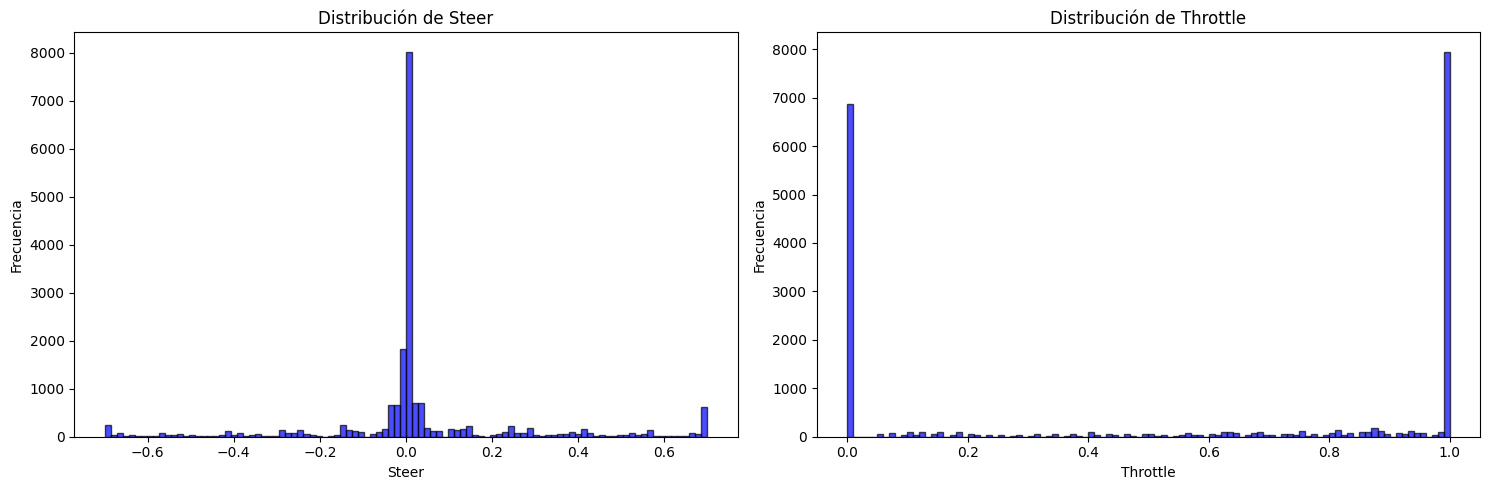

In [96]:
import matplotlib.pyplot as plt

def plot_histograms(df, bins=30):
    """
    Genera histogramas de las columnas 'steer', 'brake', y 'throttle'.
    
    Args:
        df (pandas.DataFrame): DataFrame con las columnas de interés.
        bins (int): Número de bins para el histograma.
    """
    # Asegurarse de que las columnas existan en el DataFrame
    required_columns = ['steer', 'brake', 'throttle']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"El DataFrame no contiene la columna requerida: {col}")
    
    # Crear histogramas
    plt.figure(figsize=(15, 5))

    # Histograma de steer
    plt.subplot(1, 2, 1)
    plt.hist(df['steer'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    plt.title('Distribución de Steer')
    plt.xlabel('Steer')
    plt.ylabel('Frecuencia')

    # Histograma de brake
    # plt.subplot(1, 3, 2)
    # plt.hist(df['brake'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    # plt.title('Distribución de Brake')
    # plt.xlabel('Brake')
    # plt.ylabel('Frecuencia')

    # Histograma de throttle
    plt.subplot(1, 2, 2)
    plt.hist(df['throttle'], bins=bins, alpha=0.7, color='blue', edgecolor='k')
    plt.title('Distribución de Throttle')
    plt.xlabel('Throttle')
    plt.ylabel('Frecuencia')

    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con tu DataFrame
import pandas as pd
plot_histograms(labels_df, bins=100)


In [97]:
import pandas as pd
import numpy as np

# Definir los bins manualmente
bins = np.arange(-0.1, 0.95 + 0.07, 0.02)  # de 0.0 a 0.9 con pasos de 0.05

# Cortar el DataFrame en intervalos de throttle
labels_df['throttle_bin'] = pd.cut(labels_df['throttle'], bins)

# Contar frecuencia por bin
frecuencias = labels_df['throttle_bin'].value_counts().sort_index()

# Mostrar
# Mostrar todas las filas del resultado
pd.set_option('display.max_rows', None)

# Ahora sí imprime toda la frecuencia por bin
print(frecuencias)


(-0.1, -0.08]           0
(-0.08, -0.06]          0
(-0.06, -0.04]          0
(-0.04, -0.02]          0
(-0.02, 1.39e-17]    6870
(1.39e-17, 0.02]        0
(0.02, 0.04]            0
(0.04, 0.06]           49
(0.06, 0.08]           80
(0.08, 0.1]            40
(0.1, 0.12]           140
(0.12, 0.14]           90
(0.14, 0.16]          160
(0.16, 0.18]           39
(0.18, 0.2]           105
(0.2, 0.22]            78
(0.22, 0.24]           33
(0.24, 0.26]           36
(0.26, 0.28]           21
(0.28, 0.3]            40
(0.3, 0.32]            72
(0.32, 0.34]           18
(0.34, 0.36]           50
(0.36, 0.38]           76
(0.38, 0.4]            24
(0.4, 0.42]           121
(0.42, 0.44]           57
(0.44, 0.46]           36
(0.46, 0.48]           75
(0.48, 0.5]            70
(0.5, 0.52]            66
(0.52, 0.54]           43
(0.54, 0.56]           58
(0.56, 0.58]           98
(0.58, 0.6]            38
(0.6, 0.62]           106
(0.62, 0.64]          195
(0.64, 0.66]           83
(0.66, 0.68]

In [98]:
import pandas as pd
import numpy as np

# Definir los bins manualmente
bins = np.arange(-1.1, 0.96 + 0.05, 0.02)  # de 0.0 a 0.9 con pasos de 0.05

# Cortar el DataFrame en intervalos de throttle
labels_df['steer_bin'] = pd.cut(labels_df['steer'], bins)

# Contar frecuencia por bin
frecuencias = labels_df['steer_bin'].value_counts().sort_index()

# Mostrar
# Mostrar todas las filas del resultado
pd.set_option('display.max_rows', None)

# Ahora sí imprime toda la frecuencia por bin
print(frecuencias)


(-1.1, -1.08]           0
(-1.08, -1.06]          0
(-1.06, -1.04]          0
(-1.04, -1.02]          0
(-1.02, -1.0]           0
(-1.0, -0.98]           0
(-0.98, -0.96]          0
(-0.96, -0.94]          0
(-0.94, -0.92]          0
(-0.92, -0.9]           0
(-0.9, -0.88]           0
(-0.88, -0.86]          0
(-0.86, -0.84]          0
(-0.84, -0.82]          0
(-0.82, -0.8]           0
(-0.8, -0.78]           0
(-0.78, -0.76]          0
(-0.76, -0.74]          0
(-0.74, -0.72]          0
(-0.72, -0.7]           0
(-0.7, -0.68]         294
(-0.68, -0.66]         69
(-0.66, -0.64]         15
(-0.64, -0.62]         38
(-0.62, -0.6]          24
(-0.6, -0.58]           4
(-0.58, -0.56]         87
(-0.56, -0.54]         80
(-0.54, -0.52]         37
(-0.52, -0.5]          70
(-0.5, -0.48]          11
(-0.48, -0.46]         30
(-0.46, -0.44]          6
(-0.44, -0.42]         64
(-0.42, -0.4]         172
(-0.4, -0.38]          47
(-0.38, -0.36]         96
(-0.36, -0.34]         61
(-0.34, -0.3

In [99]:
def reduce_bin(df, column, bin_min, bin_max, max_samples=15, random_state=42):
    """
    Reduce el número de muestras dentro de un bin específico a un máximo de `max_samples`.
    
    Args:
        df (pd.DataFrame): El DataFrame original.
        column (str): Nombre de la columna a analizar.
        bin_min (float): Límite inferior del bin (inclusive).
        bin_max (float): Límite superior del bin (inclusive).
        max_samples (int): Máximo de muestras a mantener dentro del bin.
        random_state (int): Semilla para muestreo reproducible.

    Returns:
        pd.DataFrame: Nuevo DataFrame con el bin reducido.
    """
    bin_mask = (df[column] >= bin_min) & (df[column] <= bin_max)
    in_bin = df[bin_mask]
    out_bin = df[~bin_mask]
    
    if len(in_bin) > max_samples:
        in_bin = in_bin.sample(n=max_samples, random_state=random_state)
    
    return pd.concat([out_bin, in_bin], ignore_index=True)


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Balancear los datos en función de 'steer'
def balance_by_steer(labels_df, steer_min=-0.04, steer_max=0.04, max_samples=6000):  #max_samples=8000
    # Filtrar rectas y otros
    rectas_df = labels_df[(labels_df['steer'] >= steer_min) & (labels_df['steer'] <= steer_max)]
    otras_df = labels_df[(labels_df['steer'] < steer_min) | (labels_df['steer'] > steer_max)]
    
    # Muestrear aleatoriamente hasta 'max_samples' filas de rectas
    rectas_sampled = rectas_df.sample(n=max_samples, random_state=42) if len(rectas_df) > max_samples else rectas_df
    
    labels_df_balanced = pd.concat([rectas_sampled, otras_df], ignore_index=True)
    return labels_df_balanced

# Paso 2: Balancear los datos en función de 'throttle' usando el dataset balanceado por 'steer'
def balance_by_throttle(labels_df, throttle_min=0.0, throttle_max=0.1, max_samples=3000): #max_samples=6000
    # Filtrar rangos de throttle
    low_throttle_df = labels_df[(labels_df['throttle'] >= throttle_min) & (labels_df['throttle'] <= throttle_max)]
    high_throttle_df = labels_df[(labels_df['throttle'] > throttle_max)]
    
    # Muestrear aleatoriamente hasta 'max_samples' filas de bajo throttle
    low_throttle_sampled = low_throttle_df.sample(n=max_samples, random_state=42) if len(low_throttle_df) > max_samples else low_throttle_df
    
    # Concatenar el dataset balanceado
    labels_df_balanced = pd.concat([low_throttle_sampled, high_throttle_df], ignore_index=True)
    return labels_df_balanced

def reduce_last_bin(labels_df, column='throttle', bin_min=0.85, bin_max=1.0, max_samples=3000): #max_samples=350
    # Filtrar filas que están en el último bin
    last_bin_df = labels_df[(labels_df[column] >= bin_min) & (labels_df[column] <= bin_max)]
    other_df = labels_df[(labels_df[column] < bin_min) | (labels_df[column] > bin_max)]
    
    # Reducir el número de muestras en el último bin
    if len(last_bin_df) > max_samples:
        last_bin_sampled = last_bin_df.sample(n=max_samples, random_state=42)
    else:
        last_bin_sampled = last_bin_df
    
    # Concatenar los datos balanceados
    balanced_df = pd.concat([other_df, last_bin_sampled], ignore_index=True)
    return balanced_df




In [101]:
# 1) Balanceo por STEER
labels_df = balance_by_steer(labels_df,
                             steer_min=-0.04, steer_max=0.04,
                             max_samples=7000)

# 2) Balanceo por THROTTLE (bajo)
labels_df = balance_by_throttle(labels_df,
                                throttle_min=0.0, throttle_max=0.05,
                                max_samples=3500)

# 3) BIN adicional: zona media de THROTTLE
labels_df = reduce_bin(labels_df, 'throttle',
                       bin_min=0.2, bin_max=0.6,
                       max_samples=4000)

# 4) Recorte del pico alto de THROTTLE
labels_df = reduce_last_bin(labels_df,
                            column='throttle',
                            bin_min=0.9, bin_max=1.0,
                            max_samples=1500)


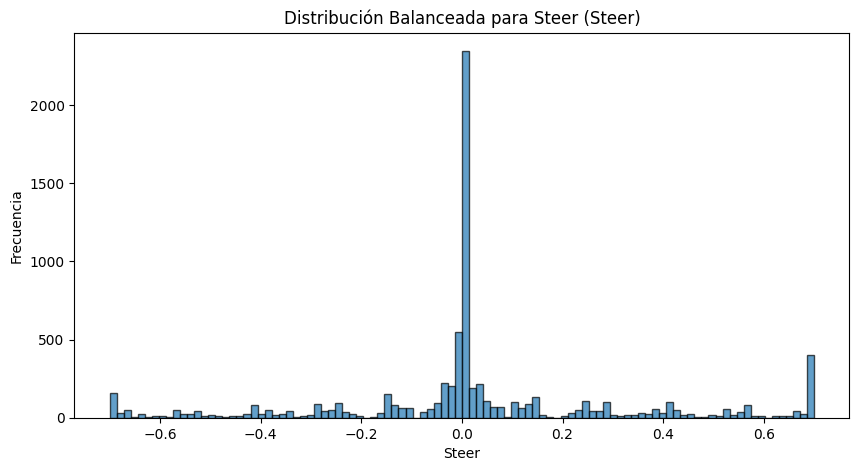

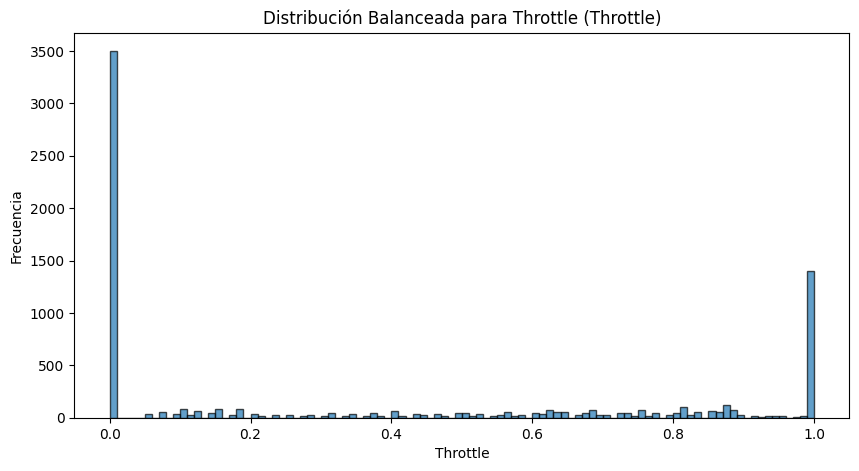

In [102]:


def plot_distribution(df, column, bins=100, title="Distribución del Dataset Balanceado"):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=bins, edgecolor='k', alpha=0.7)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frecuencia')
    plt.title(f'{title} ({column.capitalize()})')
    plt.show()

# Graficar las distribuciones balanceadas
plot_distribution(labels_df, 'steer', title="Distribución Balanceada para Steer")
plot_distribution(labels_df, 'throttle', title="Distribución Balanceada para Throttle")
# plot_distribution(balanced_brake_df, 'brake', title="Distribución Balanceada para Brake")


In [103]:
print(len(labels_df))

7651


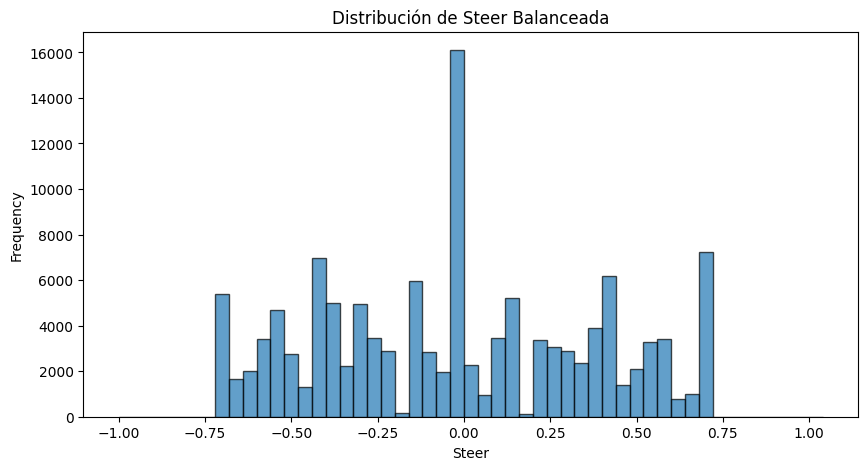

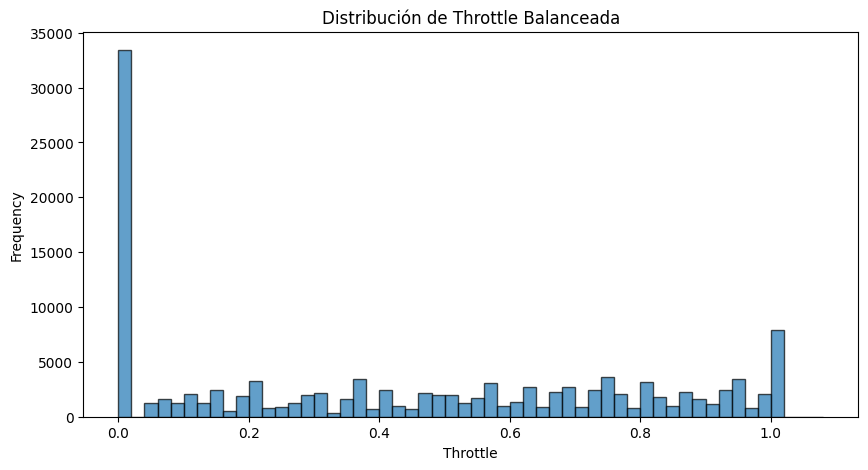

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
desired_count = 4100 # 4000
desired_count_near_zero = 4100

def resample_column(df, column, bins_range, bin_size, desired_count_default=12000, desired_count_near_zero=2000): # 8000, 1000
    resampled = pd.DataFrame()
    
    for bin_start in np.arange(bins_range[0], bins_range[1], bin_size):
        # Filtrar el DataFrame para el rango actual
        part_df = df[(df[column] >= bin_start) & (df[column] < bin_start + bin_size)]
        
        # Ajustar el desired_count para los valores cercanos a cero
        # if -bin_size / 2 <= bin_start < bin_size / 2:
        #     desired_count_local = desired_count_near_zero
        if abs(bin_start) > 0.5:
            desired_count_local = int(desired_count_near_zero * 1.2)
        elif abs(bin_start) < 0.1:
            desired_count_local = desired_count_near_zero
        else:
            desired_count_local = desired_count_default

        
        # Resamplear si el tamaño es menor al deseado
        if part_df.shape[0] > 0 and part_df.shape[0] < desired_count_local:
            # Calcular el factor de repetición necesario
            repeat_factor = max(1, int(desired_count_local // part_df.shape[0]))
            part_df_repeated = pd.concat([part_df] * repeat_factor, ignore_index=True)
            
            # Agregar muestras adicionales si es necesario
            remaining_samples = desired_count_local - part_df_repeated.shape[0]
            if remaining_samples > 0:
                part_df_remaining = part_df.sample(remaining_samples, replace=True, random_state=1)
                part_df_repeated = pd.concat([part_df_repeated, part_df_remaining], ignore_index=True)
            
            # Agregar al dataframe resampleado
            resampled = pd.concat([resampled, part_df_repeated], ignore_index=True)
        else:
            # Si ya tiene suficientes muestras, agregar la parte original
            resampled = pd.concat([resampled, part_df], ignore_index=True)
    
    return resampled

# Resamplear `steer`
resampled_steer = resample_column(
    labels_df, 
    column='steer', 
    bins_range=(-1.0, 1.0),  # (-1.0, 1.0) 
    bin_size=0.1,  # 0.08 
    desired_count_default=desired_count, 
    desired_count_near_zero=desired_count_near_zero   # 1000
)

# Resamplear `throttle` usando el resultado balanceado de `steer`
resampled_throttle = resample_column(
    resampled_steer, 
    column='throttle', 
    bins_range=(0.0, 1.1), 
    bin_size=0.05, 
    desired_count_default=desired_count,  # 3000
    desired_count_near_zero=desired_count_near_zero # 1000
)

# Resamplear `brake` usando el resultado balanceado de `throttle`
# resampled_brake = resample_column(
#     resampled_throttle, 
#     column='brake', 
#     bins_range=(0.0, 1.0), 
#     bin_size=0.04, 
#     desired_count_default=desired_count, 
#     desired_count_near_zero=1000
# )

# Verificar la nueva distribución de cada columna balanceada
bins = 100
def plot_distribution(df, column, bins, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=bins, edgecolor='k', alpha=0.7)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Graficar distribuciones balanceadas
plot_distribution(resampled_throttle, 'steer', bins=np.arange(-1.0, 1.08, 0.04), title='Distribución de Steer Balanceada')
plot_distribution(resampled_throttle, 'throttle', bins=np.arange(0.0, 1.1, 0.02), title='Distribución de Throttle Balanceada')
# plot_distribution(resampled_brake, 'brake', bins=np.arange(0.0, 1.1, 0.1), title='Distribución de Brake Balanceada')


# resampled = resampled_brake
resampled = resampled_throttle

In [105]:
import pandas as pd
import numpy as np

# Definir los bins manualmente
bins = np.arange(-0.02, 1.1, 0.02)  # de 0.0 a 0.9 con pasos de 0.05

# Cortar el DataFrame en intervalos de throttle
resampled['throttle_bin'] = pd.cut(resampled['throttle'], bins)

# Contar frecuencia por bin
frecuencias = resampled['throttle_bin'].value_counts().sort_index()

# Mostrar
print(frecuencias)

(-0.02, 0.0]    33420
(0.0, 0.02]         0
(0.02, 0.04]        0
(0.04, 0.06]     1294
(0.06, 0.08]     1599
(0.08, 0.1]      1207
(0.1, 0.12]      2035
(0.12, 0.14]     1296
(0.14, 0.16]     2417
(0.16, 0.18]      519
(0.18, 0.2]      1933
(0.2, 0.22]      3296
(0.22, 0.24]      804
(0.24, 0.26]      916
(0.26, 0.28]     1215
(0.28, 0.3]      1969
(0.3, 0.32]      2149
(0.32, 0.34]      303
(0.34, 0.36]     1648
(0.36, 0.38]     3434
(0.38, 0.4]       666
(0.4, 0.42]      2393
(0.42, 0.44]     1000
(0.44, 0.46]      707
(0.46, 0.48]     2143
(0.48, 0.5]      2302
(0.5, 0.52]      1662
(0.52, 0.54]     1269
(0.54, 0.56]     1715
(0.56, 0.58]     3046
(0.58, 0.6]       983
(0.6, 0.62]      1346
(0.62, 0.64]     2721
(0.64, 0.66]      853
(0.66, 0.68]     2230
(0.68, 0.7]      2690
(0.7, 0.72]       928
(0.72, 0.74]     2434
(0.74, 0.76]     3634
(0.76, 0.78]     2077
(0.78, 0.8]       767
(0.8, 0.82]      3139
(0.82, 0.84]     1781
(0.84, 0.86]      985
(0.86, 0.88]     2280
(0.88, 0.9

In [106]:
resampled = reduce_bin(resampled, column="throttle", bin_min=-0.02, bin_max=0.0, max_samples=1200)
resampled = reduce_bin(resampled, column="throttle", bin_min=0.98, bin_max=1.0, max_samples=1500)
# resampled = reduce_bin(resampled, column="throttle", bin_min=0.1, bin_max=0.12, max_samples=1800)


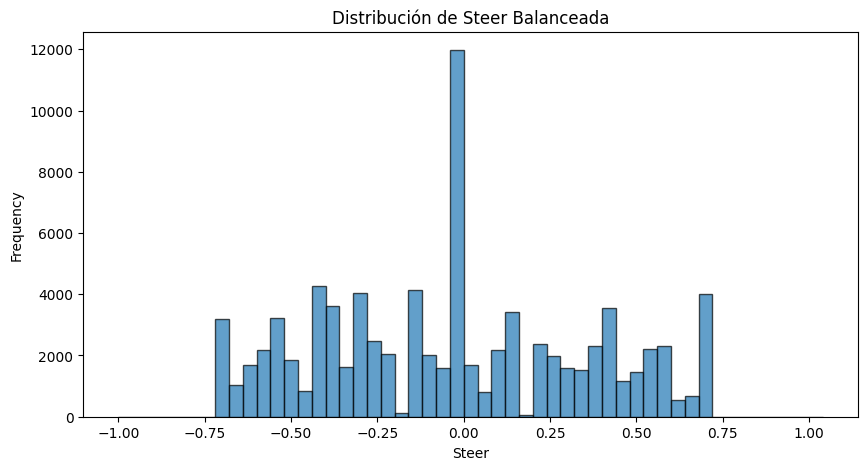

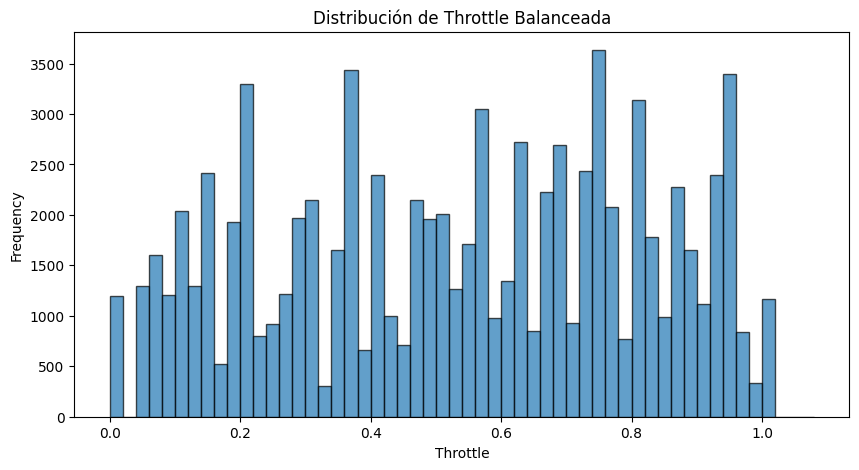

In [107]:
# Verificar la nueva distribución de cada columna balanceada
def plot_distribution(df, column, bins, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=bins, edgecolor='k', alpha=0.7)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Graficar distribuciones balanceadas
plot_distribution(resampled, 'steer', bins=np.arange(-1.0, 1.08, 0.04), title='Distribución de Steer Balanceada')
plot_distribution(resampled, 'throttle', bins=np.arange(0.0, 1.1, 0.02), title='Distribución de Throttle Balanceada')
# plot_distribution(resampled_brake, 'brake', bins=np.arange(0.0, 1.1, 0.1), title='Distribución de Brake Balanceada')


In [108]:
import pandas as pd
import numpy as np

# Definir los bins manualmente
bins = np.arange(0.0, 1.0, 0.04)  # de 0.0 a 0.9 con pasos de 0.05

# Cortar el DataFrame en intervalos de throttle
resampled['throttle_bin'] = pd.cut(resampled['throttle'], bins)

# Contar frecuencia por bin
frecuencias = resampled['throttle_bin'].value_counts().sort_index()

# Mostrar
print(frecuencias)

(0.0, 0.04]        0
(0.04, 0.08]    2893
(0.08, 0.12]    3242
(0.12, 0.16]    3713
(0.16, 0.2]     2452
(0.2, 0.24]     4100
(0.24, 0.28]    2131
(0.28, 0.32]    4118
(0.32, 0.36]    1951
(0.36, 0.4]     4100
(0.4, 0.44]     3393
(0.44, 0.48]    2850
(0.48, 0.52]    3964
(0.52, 0.56]    2984
(0.56, 0.6]     4029
(0.6, 0.64]     4067
(0.64, 0.68]    3083
(0.68, 0.72]    3618
(0.72, 0.76]    6068
(0.76, 0.8]     2844
(0.8, 0.84]     4920
(0.84, 0.88]    3265
(0.88, 0.92]    2777
(0.92, 0.96]    5787
Name: throttle_bin, dtype: int64


In [109]:
# resampled['seg_path'][0]
# resampled.to_csv("dagger_data.csv", index=False)
resampled['seg_path'][0]


resampled.to_csv("cm_curvature_balanced_curva.csv", index=False)
print("✅ CSV guardado *.csv'")


✅ CSV guardado *.csv'


In [110]:
print(len(resampled))

85887


In [111]:
resampled.head()


,image_seg_name,curvature,steer,throttle,brake,seg_path,throttle_bin,steer_bin
0,dataset_04/imageSEG/frame_360559_seg.png,tensor([1]),-0.60,0.06,0.0,dataset_04/imageSEG/frame_360559_seg.png,"(0.04, 0.08]","(-0.62, -0.6]"
1,dataset_04/imageSEG/frame_360609_seg.png,tensor([1]),-0.60,0.08,0.0,dataset_04/imageSEG/frame_360609_seg.png,"(0.04, 0.08]","(-0.62, -0.6]"
2,dataset_04/imageSEG/frame_387009_seg.png,tensor([1]),-0.70,0.05,0.0,dataset_04/imageSEG/frame_387009_seg.png,"(0.04, 0.08]","(-0.7, -0.68]"
3,dataset_04/imageSEG/frame_387559_seg.png,tensor([1]),-0.68,0.07,0.0,dataset_04/imageSEG/frame_387559_seg.png,"(0.04, 0.08]","(-0.7, -0.68]"
4,dataset_04/imageSEG/frame_387609_seg.png,tensor([1]),-0.69,0.07,0.0,dataset_04/imageSEG/frame_387609_seg.png,"(0.04, 0.08]","(-0.7, -0.68]"


In [46]:
print(resampled.columns)
print(resampled['image_seg_name'].head())

Index(['image_seg_name', 'curvature', 'steer', 'throttle', 'brake',
       'throttle_bin', 'steer_bin'],
      dtype='object')
0    frame_387659_seg.png
1    frame_387659_seg.png
2    frame_387659_seg.png
3    frame_387659_seg.png
4    frame_387659_seg.png
Name: image_seg_name, dtype: object


In [29]:
import pandas as pd
import numpy as np

# Definir los bins manualmente
bins = np.arange(0.0, 0.9 + 0.05, 0.05)  # de 0.0 a 0.9 con pasos de 0.05

# Cortar el DataFrame en intervalos de throttle
labels_df['throttle_bin'] = pd.cut(labels_df['throttle'], bins)

# Contar frecuencia por bin
frecuencias = labels_df['throttle_bin'].value_counts().sort_index()

# Mostrar
print(frecuencias)


(0.0, 0.05]     24
(0.05, 0.1]     24
(0.1, 0.15]     95
(0.15, 0.2]     31
(0.2, 0.25]     31
(0.25, 0.3]     33
(0.3, 0.35]     62
(0.35, 0.4]     48
(0.4, 0.45]     53
(0.45, 0.5]     69
(0.5, 0.55]     28
(0.55, 0.6]     42
(0.6, 0.65]     11
(0.65, 0.7]     12
(0.7, 0.75]     17
(0.75, 0.8]     44
(0.8, 0.85]     13
(0.85, 0.9]    634
Name: throttle_bin, dtype: int64


In [41]:
len(resampled)

84939

In [30]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def process_image(image_info):
    seg_path, steer_value, throttle_value = image_info  # Solo 3 valores ahora
    full_seg_path = seg_path
    
    # Verifica si existe la imagen segmentada en la ruta
    if not os.path.isfile(full_seg_path):
        raise FileNotFoundError(f"La imagen segmentada {full_seg_path} no se encuentra.")
    
    # Cargar y procesar la imagen segmentada
    image_seg = cv2.imread(full_seg_path)
    if image_seg is None:
        raise ValueError(f"Error al leer la imagen segmentada {full_seg_path}.")
    
    # Definir el color de la calzada y crear la máscara
    calzada_color = [128, 64, 128]
    mask = cv2.inRange(image_seg, np.array(calzada_color), np.array(calzada_color))
    
    # Convertir la máscara en tres canales y en escala de grises
    image_seg_masked = np.zeros_like(image_seg)
    image_seg_masked[mask > 0] = [255, 255, 255]  # Calzada en blanco, resto en negro
    
    # Redimensionar la imagen resultante
    image_seg_rgb = cv2.resize(image_seg_masked[200:-1, :], (200, 66))
    
    # Asegurarse de que la imagen esté en escala de grises en los tres canales
    image_seg_rgb = cv2.cvtColor(image_seg_rgb, cv2.COLOR_BGR2GRAY)
    image_seg_rgb = cv2.merge([image_seg_rgb, image_seg_rgb, image_seg_rgb])
    
    # Devolver la imagen procesada y las etiquetas
    return image_seg_rgb, [steer_value, throttle_value]

def get_images_array(df, max_workers=4):
    required_columns = ['seg_path', 'steer', 'throttle']
    for column in required_columns:
        if column not in df.columns:
            raise ValueError(f"La columna '{column}' no se encuentra en el DataFrame.")
    
    # Extraer valores de las columnas
    seg_paths = df['seg_path'].to_numpy()
    steering_values = df['steer'].to_numpy()
    throttle_values = df['throttle'].to_numpy()

    # Normalizar valores
    normalized_steering_values = np.interp(steering_values, (-1, 1), (0, 1))
    normalized_throttle_values = np.interp(throttle_values, (0, 1), (0, 1))
    
    # Validar que todas las listas tengan el mismo tamaño
    if len(seg_paths) != len(normalized_steering_values) or len(seg_paths) != len(normalized_throttle_values):
        raise ValueError("El número de imágenes no coincide con el número de valores de etiquetas.")
    
    # Crear la lista de información de imágenes
    image_info_list = [
        (seg_paths[i], normalized_steering_values[i], normalized_throttle_values[i]) 
        for i in range(len(seg_paths))
    ]

    images = []
    labels = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_image = {executor.submit(process_image, info): info for info in image_info_list}
        
        # Usar tqdm para mostrar la barra de progreso
        for future in tqdm(as_completed(future_to_image), total=len(image_info_list), desc="Procesando imágenes"):
            try:
                processed_image, label = future.result()
                images.append(processed_image)
                labels.append(label)
            except Exception as exc:
                print(f'Error al procesar la imagen: {exc}')

    return np.array(images), np.array(labels)


In [11]:
import tensorflow as tf
import numpy as np
import albumentations as A
import math

train_transform = A.Compose([
    A.Affine(translate_percent=(-0.1, 0.1), scale=(0.9, 1.1), rotate=(-10, 10), p=0.6),  
    A.Perspective(scale=(0.08, 0.12), p=0.4),  
    A.MotionBlur(blur_limit=5, p=0.3),  
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),  
    A.GaussNoise(std_range=(0.05, 0.1), p=0.4),  
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.4),  
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.4),  
    A.ElasticTransform(alpha=1, sigma=50, p=0.3),  
])

val_transform = None  # Sin transformaciones en validación

2025-05-18 12:17:02.514231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747588622.592405    4751 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747588622.620058    4751 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/canveo/virtualenvs/carla_ros2/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [12]:
import torch
from torch.utils.data import Dataset
import numpy as np

class DataGenerator(Dataset):
    def __init__(self, x_set, y_set, transform=None):
        """
        Generador de datos para imágenes y etiquetas (steering, throttle).

        Parámetros:
        - x_set: Array o lista de imágenes con forma (66, 200, 3).
        - y_set: Array o lista de etiquetas (steering, throttle).
        - transform: Transformaciones de Albumentations (opcional).
        """
        self.x = np.array(x_set, dtype=np.uint8)
        self.y = np.array(y_set, dtype=np.float32)
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        # Obtener imagen y etiqueta
        image = self.x[idx]
        label = self.y[idx]
        
        # Aplicar transformaciones si están definidas
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image'].astype(np.float32)
        else:
            image = image.astype(np.float32) / 255.0
        
        # Convertir la imagen a tensor y cambiar el orden de dimensiones (C, H, W)
        if image.ndim == 3:
            image = image.transpose(2, 0, 1)
        image_tensor = torch.from_numpy(image)
        
        # Convertir etiquetas a tensor
        # Se espera que label tenga dos elementos: [steering, throttle]
        steering = torch.tensor(label[0], dtype=torch.float32).unsqueeze(0)
        throttle = torch.tensor(label[1], dtype=torch.float32).unsqueeze(0)
        
        return image_tensor, (steering, throttle)


In [13]:
"""
This implementation of Convolutional LSTM has been adapted from https://github.com/ndrplz/ConvLSTM_pytorch.
"""

import torch.nn as nn
import torch
# from convlstm import ConvLSTM

class ConvLSTMCell(nn.Module):

    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        input_dim: int
            Number of channels of input tensor.
        hidden_dim: int
            Number of channels of hidden state.
        kernel_size: (int, int)
            Size of the convolutional kernel.
        bias: bool
            Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))


class ConvLSTM(nn.Module):

    """

    Parameters:
        input_dim: Number of channels in input
        hidden_dim: Number of hidden channels
        kernel_size: Size of kernel in convolutions
        num_layers: Number of LSTM layers stacked on each other
        batch_first: Whether or not dimension 0 is the batch or not
        bias: Bias or no bias in Convolution
        return_all_layers: Return the list of computations for all layers
        Note: Will do same padding.

    Input:
        A tensor of size B, T, C, H, W or T, B, C, H, W
    Output:
        A tuple of two lists of length num_layers (or length 1 if return_all_layers is False).
            0 - layer_output_list is the list of lists of length T of each output
            1 - last_state_list is the list of last states
                    each element of the list is a tuple (h, c) for hidden state and memory
    Example:
        >> x = torch.rand((32, 10, 64, 128, 128))
        >> convlstm = ConvLSTM(64, 16, 3, 1, True, True, False)
        >> _, last_states = convlstm(x)
        >> h = last_states[0][0]  # 0 for layer index, 0 for h index
    """

    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers,
                 batch_first=False, bias=True, return_all_layers=False):
        super(ConvLSTM, self).__init__()

        self._check_kernel_size_consistency(kernel_size)

        # Make sure that both `kernel_size` and `hidden_dim` are lists having len == num_layers
        kernel_size = self._extend_for_multilayer(kernel_size, num_layers)
        hidden_dim = self._extend_for_multilayer(hidden_dim, num_layers)
        if not len(kernel_size) == len(hidden_dim) == num_layers:
            raise ValueError('Inconsistent list length.')

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.bias = bias
        self.return_all_layers = return_all_layers

        cell_list = []
        for i in range(0, self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dim[i - 1]

            cell_list.append(ConvLSTMCell(input_dim=cur_input_dim,
                                          hidden_dim=self.hidden_dim[i],
                                          kernel_size=self.kernel_size[i],
                                          bias=self.bias))

        self.cell_list = nn.ModuleList(cell_list)

    def forward(self, input_tensor, hidden_state=None):
        """

        Parameters
        ----------
        input_tensor: todo
            5-D Tensor either of shape (t, b, c, h, w) or (b, t, c, h, w)
        hidden_state: todo
            None. todo implement stateful

        Returns
        -------
        last_state_list, layer_output
        """
        if not self.batch_first:
            # (t, b, c, h, w) -> (b, t, c, h, w)
            input_tensor = input_tensor.permute(1, 0, 2, 3, 4)

        b, _, _, h, w = input_tensor.size()

        # Implement stateful ConvLSTM
        if hidden_state is not None:
            raise NotImplementedError()
        else:
            # Since the init is done in forward. Can send image size here
            hidden_state = self._init_hidden(batch_size=b,
                                             image_size=(h, w))

        layer_output_list = []
        last_state_list = []

        seq_len = input_tensor.size(1)
        cur_layer_input = input_tensor

        for layer_idx in range(self.num_layers):

            h, c = hidden_state[layer_idx]
            output_inner = []
            for t in range(seq_len):
                h, c = self.cell_list[layer_idx](input_tensor=cur_layer_input[:, t, :, :, :],
                                                 cur_state=[h, c])
                output_inner.append(h)

            layer_output = torch.stack(output_inner, dim=1)
            cur_layer_input = layer_output

            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        if not self.return_all_layers:
            layer_output_list = layer_output_list[-1:]
            last_state_list = last_state_list[-1:]

        return layer_output_list, last_state_list

    def _init_hidden(self, batch_size, image_size):
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, image_size))
        return init_states

    @staticmethod
    def _check_kernel_size_consistency(kernel_size):
        if not (isinstance(kernel_size, tuple) or
                (isinstance(kernel_size, list) and all([isinstance(elem, tuple) for elem in kernel_size]))):
            raise ValueError('`kernel_size` must be tuple or list of tuples')

    @staticmethod
    def _extend_for_multilayer(param, num_layers):
        if not isinstance(param, list):
            param = [param] * num_layers
        return param


class ModifiedDeepestLSTM(nn.Module):
    def __init__(self, image_shape, num_labels):
        super(ModifiedDeepestLSTM, self).__init__()
        self.num_channels = image_shape[2]
        self.cn_1 = nn.Conv2d(self.num_channels, 8, kernel_size=3, stride=2)
        self.relu_1 = nn.ReLU()
        self.cn_2 = nn.Conv2d(8, 8, kernel_size=3, stride=2)
        self.relu_2 = nn.ReLU()
        self.cn_3 = nn.Conv2d(8, 8, kernel_size=3, stride=2)
        self.relu_3 = nn.ReLU() 
        self.dropout_1 = nn.Dropout(0.4)  # 0.2

        self.clstm_n = ConvLSTM(8, 8, (5, 5), 3, batch_first=True, bias=True, return_all_layers=False)
        
        # self.fc_1 = nn.Linear(8*11*5, 50)
        self.fc_1 = nn.Linear(8 * 7 * 24, 50)
        self.relu_fc_1 = nn.ReLU()
        self.dropout_fc1 = nn.Dropout(0.4) # 0.2
        
        self.fc_2 = nn.Linear(50, 10)
        self.relu_fc_2 = nn.ReLU()
        self.dropout_fc2 = nn.Dropout(0.4) # 0.2

        self.fc_3 = nn.Linear(10, num_labels)

    def forward(self, img):        
        out = self.cn_1(img)
        out = self.relu_1(out)
        out = self.cn_2(out)
        out = self.relu_2(out)
        out = self.cn_3(out)
        out = self.relu_3(out)
        out = self.dropout_1(out)
        # add additional dimension at 1
        out = out.unsqueeze(1) 

        _, last_states = self.clstm_n(out)
        out =  last_states[0][0]  # 0 for layer index, 0 for h index
        # flatten
        out = out.reshape(out.size(0), -1)
        out = self.fc_1(out)
        out = self.relu_fc_1(out)
        out = self.fc_2(out)
        out = self.relu_fc_2(out)
        out = self.fc_3(out)

        pred_steering = out[:, 0].unsqueeze(1) 
        pred_throttle = out[:, 1].unsqueeze(1)
        
        return pred_steering, pred_throttle
        # return out



In [14]:
# Parámetros de entrenamiento
training_params = {
    "batch_size": 16, #128, # 32
    "learning_rate": 7e-5,  # 0.0005, 0.0001, 0.001
    "epochs": 60,
    "img_shape": (66, 200, 3),
}

In [15]:
model = ModifiedDeepestLSTM(image_shape=training_params['img_shape'], num_labels=2)


In [16]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Suponiendo que ya tienes definidas las funciones get_images_array, train_transform y val_transform
all_images, all_labels = get_images_array(resampled)

# # Dividir en entrenamiento y validación
# X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# # Crear datasets de PyTorch
# train_dataset = DataGenerator(X_train, y_train, transform=train_transform)
# val_dataset = DataGenerator(X_val, y_val, transform=val_transform)

# # Crear DataLoaders (batch_size, shuffle y demás se configuran aquí)
# train_loader = DataLoader(train_dataset, training_params["batch_size"], shuffle=True, drop_last=True)
# val_loader = DataLoader(val_dataset, training_params["batch_size"], shuffle=False, drop_last=True)

Procesando imágenes: 100%|███████████████████████████████████████████| 319932/319932 [07:05<00:00, 752.46it/s]


In [17]:
# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Crear los datasets utilizando la clase DataGenerator adaptada a PyTorch
train_dataset = DataGenerator(X_train, y_train, transform=train_transform)
val_dataset = DataGenerator(X_val, y_val, transform=val_transform)

# Crear los DataLoaders; recuerda que aquí se gestiona el batch y el shuffle
train_loader = DataLoader(train_dataset, training_params["batch_size"], shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, training_params["batch_size"], shuffle=False, drop_last=True)

In [18]:
len(X_train)

255945

In [19]:
import os
import json
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# Supongamos que ya tienes definido tu modelo ModifiedDeepestLSTM
# from model import ModifiedDeepestLSTM

# # Parámetros de entrenamiento
# training_params = {
#     "batch_size": 64, #128, # 32
#     "learning_rate": 0.00005,  # 0.0005, 0.0001, 0.001
#     "epochs": 40,
#     "img_shape": (66, 200, 3),
# }

# Configurar directorio de logs y guardar parámetros
base_log_dir = "./logs"
condition = "dagger monolitico modifiedDeepestLSTM"
experiment_name = f"{condition}_experiment_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
experiment_dir = os.path.join(base_log_dir, experiment_name)
os.makedirs(experiment_dir, exist_ok=True)

with open(os.path.join(experiment_dir, 'params.json'), 'w') as f:
    json.dump(training_params, f)

# Configurar TensorBoard
writer = SummaryWriter(log_dir=experiment_dir)

# Crear el modelo y enviarlo al dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ModifiedDeepestLSTM(image_shape=training_params['img_shape'], num_labels=2)
model.to(device)

# Definir el optimizador y la función de pérdida (usando MSE para el loss)fdrop
optimizer = optim.Adam(model.parameters(), lr=training_params['learning_rate'], weight_decay=1e-4)  # weight_decay=5e-5 ó 1e-5
criterion = nn.MSELoss()

# Definir funciones para las métricas adicionales
mae_loss = nn.L1Loss()   # Para calcular MAE
mse_loss = nn.MSELoss()   # Para calcular MSE (puedes reutilizar criterion si lo deseas)

# Scheduler similar a ReduceLROnPlateau
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=6, min_lr=1e-6)  # patiente=10

# Implementación simple de EarlyStopping
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.path = path
    
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), self.path)
        if self.verbose:
            print(f"Validation loss decreased. Saving model checkpoint.")

early_stopping = EarlyStopping(patience=30, delta=0.002, verbose=True, path=os.path.join(experiment_dir, 'checkpoint.pt'))

# Supongamos que tienes definidos tus DataLoaders para entrenamiento y validación: train_loader y val_loader

# Crear un diccionario para almacenar las métricas (history)
history = {
    "train_loss": [],
    "val_loss": [],
    "train_mae": [],
    "val_mae": [],
    "train_mse": [],
    "val_mse": [],
    "lr": []
}

# Ciclo de entrenamiento
for epoch in range(training_params["epochs"]):
    model.train()
    running_train_loss = 0.0
    running_train_mae = 0.0
    running_train_mse = 0.0
    for batch in train_loader:
        # Cada batch retorna: (inputs, (labels_steering, labels_throttle))
        inputs, (labels_steering, labels_throttle) = batch
        inputs = inputs.to(device)
        labels_steering = labels_steering.to(device)
        labels_throttle = labels_throttle.to(device)
        
        optimizer.zero_grad()
        # Salidas del modelo
        pred_steering, pred_throttle = model(inputs)
        # Calcular pérdidas para ambas salidas
        loss_steering = criterion(pred_steering, labels_steering)
        loss_throttle = criterion(pred_throttle, labels_throttle)
        loss = loss_steering + loss_throttle
        
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
        
        # Calcular métricas para la salida de steering
        mae_value = mae_loss(pred_steering, labels_steering)
        mse_value = mse_loss(pred_steering, labels_steering)
        running_train_mae += mae_value.item()
        running_train_mse += mse_value.item()
    
    avg_train_loss = running_train_loss / len(train_loader)
    avg_train_mae = running_train_mae / len(train_loader)
    avg_train_mse = running_train_mse / len(train_loader)
    
    # Evaluación en validación
    model.eval()
    running_val_loss = 0.0
    running_val_mae = 0.0
    running_val_mse = 0.0
    with torch.no_grad():
        for batch in val_loader:
            inputs, (labels_steering, labels_throttle) = batch
            inputs = inputs.to(device)
            labels_steering = labels_steering.to(device)
            labels_throttle = labels_throttle.to(device)
            
            pred_steering, pred_throttle = model(inputs)
            loss_steering = criterion(pred_steering, labels_steering)
            loss_throttle = criterion(pred_throttle, labels_throttle)
            loss = loss_steering + loss_throttle
            running_val_loss += loss.item()
            
            mae_value_val = mae_loss(pred_steering, labels_steering)
            mse_value_val = mse_loss(pred_steering, labels_steering)
            running_val_mae += mae_value_val.item()
            running_val_mse += mse_value_val.item()
    
    avg_val_loss = running_val_loss / len(val_loader)
    avg_val_mae = running_val_mae / len(val_loader)
    avg_val_mse = running_val_mse / len(val_loader)
    
    print(f"Epoch {epoch+1}/{training_params['epochs']} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")
    print(f"Train MAE: {avg_train_mae:.4f} - Val MAE: {avg_val_mae:.4f}")
    print(f"Train MSE: {avg_train_mse:.4f} - Val MSE: {avg_val_mse:.4f}")
    
    # Registrar en TensorBoard
    writer.add_scalar('Loss/train', avg_train_loss, epoch)
    writer.add_scalar('Loss/val', avg_val_loss, epoch)
    writer.add_scalar('MAE/train', avg_train_mae, epoch)
    writer.add_scalar('MAE/val', avg_val_mae, epoch)
    writer.add_scalar('MSE/train', avg_train_mse, epoch)
    writer.add_scalar('MSE/val', avg_val_mse, epoch)
    
    # Actualizar scheduler y verificar early stopping
    scheduler.step(avg_val_loss)
    early_stopping(avg_val_loss, model)
    
    # Guardar logs de cada época en archivos JSON (similar a tu TrainingLogger)
    epoch_logs = {
        "epoch": epoch,
        "train_loss": avg_train_loss,
        "val_loss": avg_val_loss,
        "train_mae": avg_train_mae,
        "val_mae": avg_val_mae,
        "train_mse": avg_train_mse,
        "val_mse": avg_val_mse,
        "lr": optimizer.param_groups[0]['lr']
    }
    with open(os.path.join(experiment_dir, f'epoch_{epoch}_logs.json'), 'w') as f:
        json.dump(epoch_logs, f)
    
    # Guardar métricas en el diccionario history
    history["train_loss"].append(avg_train_loss)
    history["val_loss"].append(avg_val_loss)
    history["train_mae"].append(avg_train_mae)
    history["val_mae"].append(avg_val_mae)
    history["train_mse"].append(avg_train_mse)
    history["val_mse"].append(avg_val_mse)
    history["lr"].append(optimizer.param_groups[0]['lr'])
    
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

writer.close()

Epoch 1/60 - Train Loss: 0.1192 - Val Loss: 0.1738
Train MAE: 0.1544 - Val MAE: 0.2513
Train MSE: 0.0391 - Val MSE: 0.0924
Validation loss decreased. Saving model checkpoint.
Epoch 2/60 - Train Loss: 0.1047 - Val Loss: 0.1766
Train MAE: 0.1326 - Val MAE: 0.2621
Train MSE: 0.0296 - Val MSE: 0.1022
EarlyStopping counter: 1 out of 30
Epoch 3/60 - Train Loss: 0.0989 - Val Loss: 0.1956
Train MAE: 0.1241 - Val MAE: 0.2802
Train MSE: 0.0265 - Val MSE: 0.1160
EarlyStopping counter: 2 out of 30
Epoch 4/60 - Train Loss: 0.0965 - Val Loss: 0.1974
Train MAE: 0.1186 - Val MAE: 0.2756
Train MSE: 0.0247 - Val MSE: 0.1121
EarlyStopping counter: 3 out of 30
Epoch 5/60 - Train Loss: 0.0950 - Val Loss: 0.2136
Train MAE: 0.1152 - Val MAE: 0.2996
Train MSE: 0.0236 - Val MSE: 0.1306
EarlyStopping counter: 4 out of 30
Epoch 6/60 - Train Loss: 0.0940 - Val Loss: 0.2138
Train MAE: 0.1134 - Val MAE: 0.2949
Train MSE: 0.0230 - Val MSE: 0.1265
EarlyStopping counter: 5 out of 30
Epoch 7/60 - Train Loss: 0.0933 - V

In [20]:
# Guardar solo el state_dict del modelo
torch.save(model.state_dict(), "dagger_deepest_model_7e5_bs16_4.pth")

In [21]:
print(history.keys())

dict_keys(['train_loss', 'val_loss', 'train_mae', 'val_mae', 'train_mse', 'val_mse', 'lr'])


dict_keys(['train_loss', 'val_loss', 'train_mae', 'val_mae', 'train_mse', 'val_mse', 'lr'])


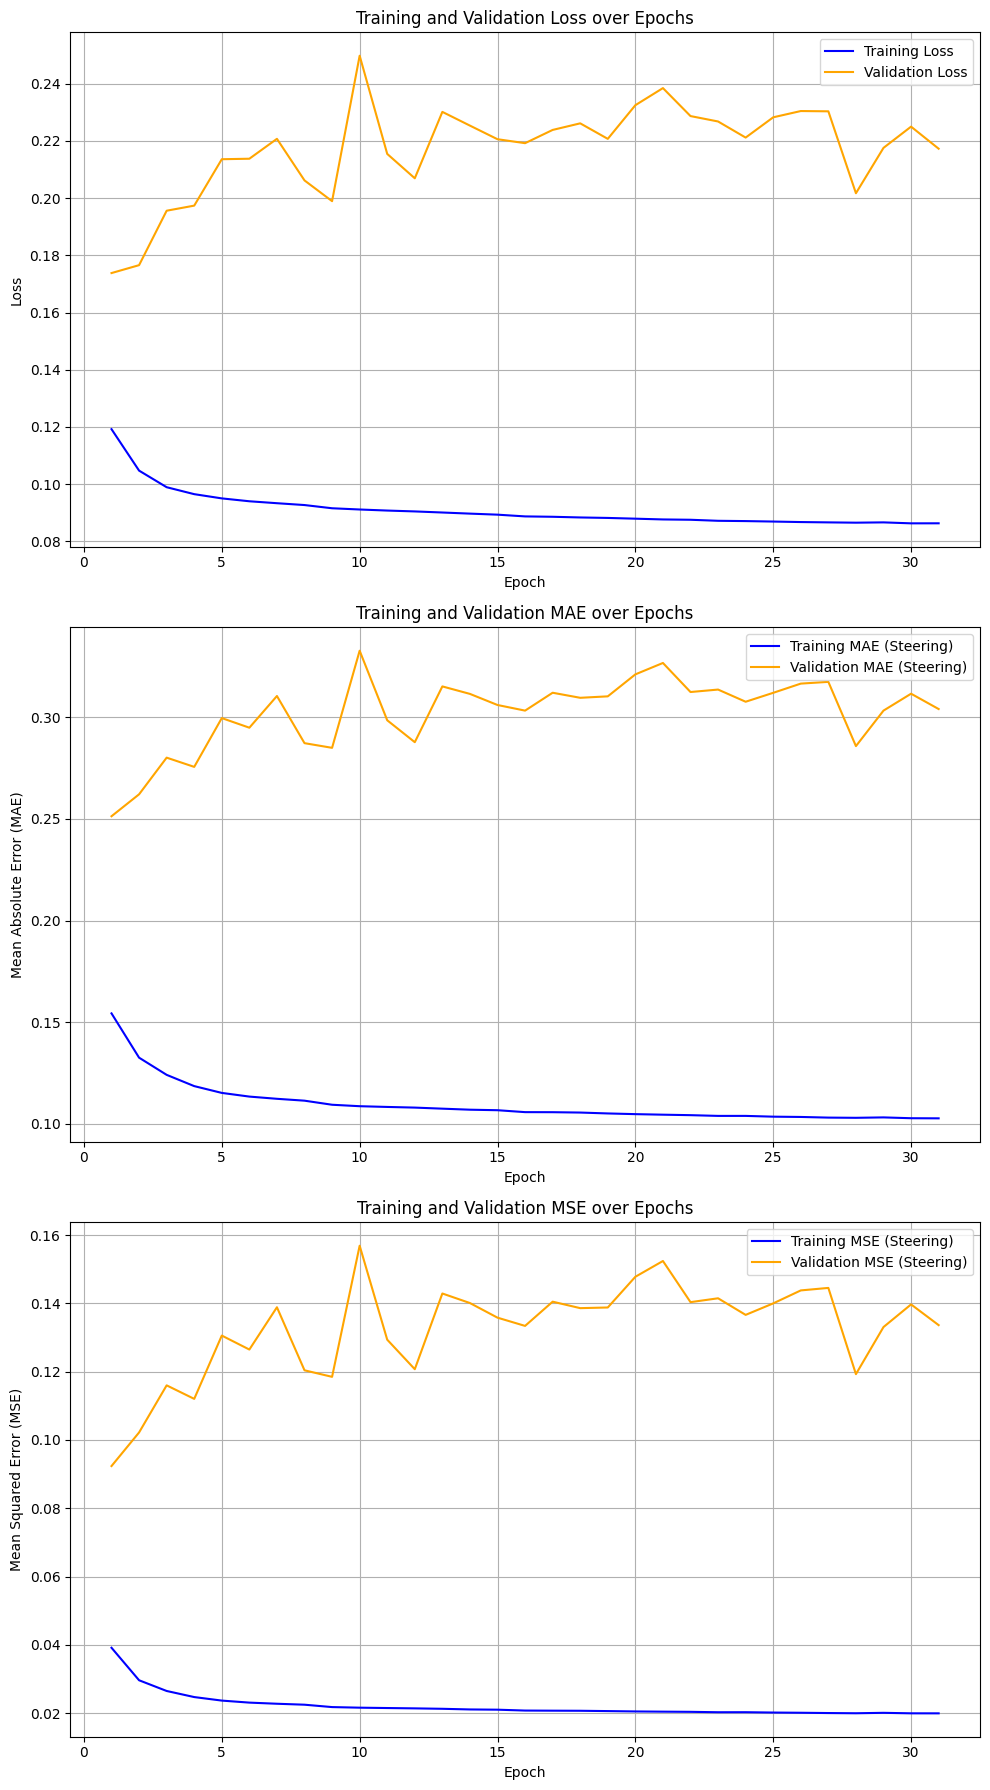

In [22]:
# Graficar las métricas registradas
print(history.keys())
epochs = range(1, len(history['train_loss']) + 1)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Gráfico de Loss
axes[0].plot(epochs, history['train_loss'], label="Training Loss", color="blue")
axes[0].plot(epochs, history['val_loss'], label="Validation Loss", color="orange")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training and Validation Loss over Epochs")
axes[0].legend()
axes[0].grid(True)

# Gráfico de MAE
axes[1].plot(epochs, history['train_mae'], label="Training MAE (Steering)", color="blue")
axes[1].plot(epochs, history['val_mae'], label="Validation MAE (Steering)", color="orange")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Mean Absolute Error (MAE)")
axes[1].set_title("Training and Validation MAE over Epochs")
axes[1].legend()
axes[1].grid(True)

# Gráfico de MSE
axes[2].plot(epochs, history['train_mse'], label="Training MSE (Steering)", color="blue")
axes[2].plot(epochs, history['val_mse'], label="Validation MSE (Steering)", color="orange")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Mean Squared Error (MSE)")
axes[2].set_title("Training and Validation MSE over Epochs")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.savefig("training_results.png")
plt.show()

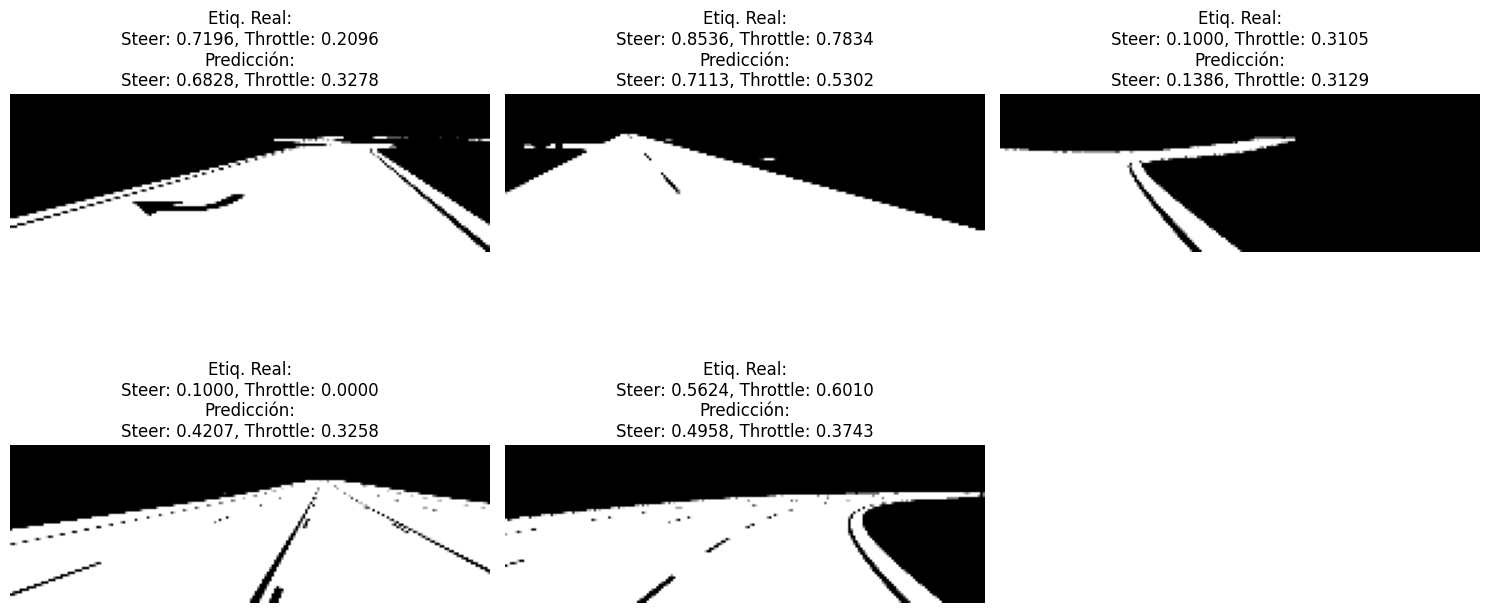

In [25]:
import random
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np
import torch

# Suponiendo que X_val y y_val son arrays de NumPy con las imágenes y etiquetas originales
num_samples = 5
sample_indices = random.sample(range(len(X_val)), num_samples)

# Extraer las imágenes de validación para las muestras seleccionadas
X_samples = np.array([X_val[i] for i in sample_indices])  # Shape: (num_samples, 66, 200, 3)

# Convertir a tensor y reordenar dimensiones a (batch, canales, alto, ancho)
X_samples_tensor = torch.from_numpy(X_samples).float()  # (num_samples, 66, 200, 3)
X_samples_tensor = X_samples_tensor.permute(0, 3, 1, 2)   # (num_samples, 3, 66, 200)
X_samples_tensor = X_samples_tensor.to(device)

# Realizar inferencias en modo evaluación
model.eval()
with torch.no_grad():
    steering_preds, throttle_preds = model(X_samples_tensor)
    steering_preds = steering_preds.cpu().numpy()
    throttle_preds = throttle_preds.cpu().numpy()

# Visualizar los resultados
plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 3, i + 1)
    
    # Mostrar la imagen; si es de un solo canal, usar cmap="gray"
    if X_val.shape[-1] == 1:
        plt.imshow(X_val[idx].squeeze(), cmap="gray")
    else:
        plt.imshow(X_val[idx])
    
    plt.title(
        f'Etiq. Real:\n'
        f'Steer: {y_val[idx][0]:.4f}, Throttle: {y_val[idx][1]:.4f}\n'
        f'Predicción:\n'
        f'Steer: {steering_preds[i][0]:.4f}, Throttle: {throttle_preds[i][0]:.4f}'
    )
    plt.axis('off')

plt.tight_layout()
os.makedirs("images", exist_ok=True)
path_name = os.path.join("images", f"{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}_predictions.png")
plt.savefig(path_name)
plt.show()


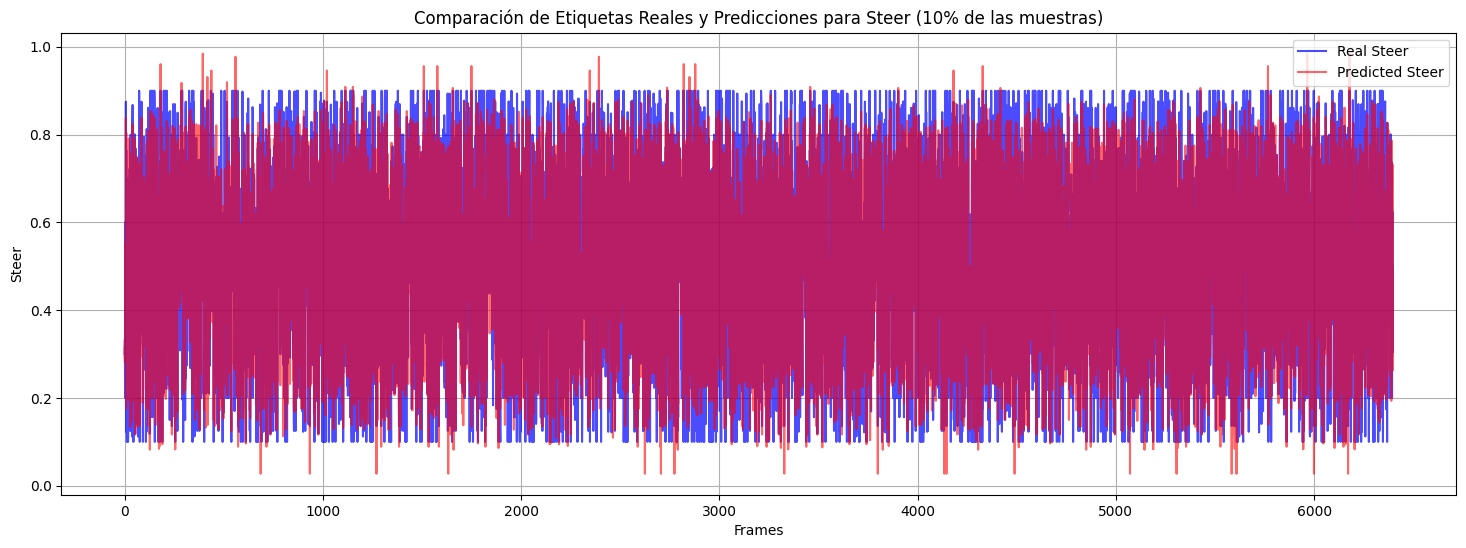

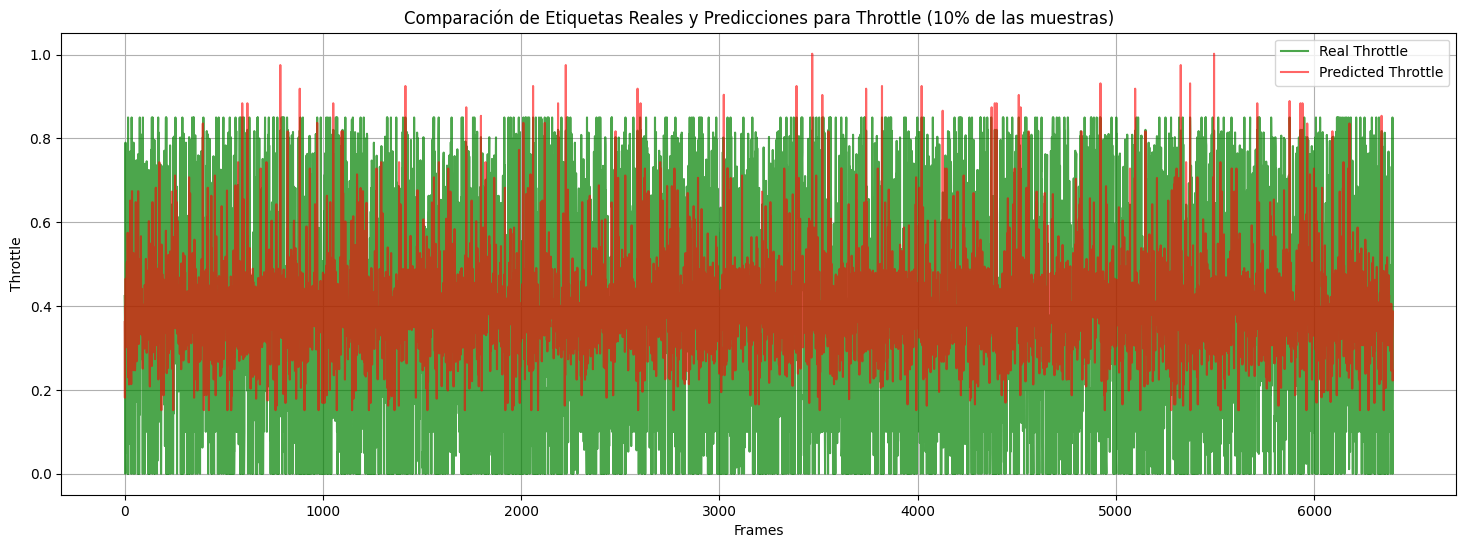

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch

# Definir el porcentaje de muestras a visualizar
percentage = 0.1  # 5%

# Calcular el número de muestras en función del porcentaje
num_samples = max(1, int(len(X_val) * percentage))  # Asegurar al menos 1 muestra

# Seleccionar índices aleatorios de las muestras
sample_indices = random.sample(range(len(X_val)), num_samples)

# Crear submuestras de X_val y y_val usando los índices seleccionados
X_val_sample = X_val[sample_indices]
y_val_sample = np.array(y_val)[sample_indices]  # Convertir etiquetas a numpy array

# Convertir X_val_sample a tensor y reordenar dimensiones: (batch, canales, alto, ancho)
X_val_sample_tensor = torch.from_numpy(X_val_sample).float()  # Suponiendo formato (num_samples, 66, 200, 3)
X_val_sample_tensor = X_val_sample_tensor.permute(0, 3, 1, 2)   # (num_samples, 3, 66, 200)
X_val_sample_tensor = X_val_sample_tensor.to(device)

# Obtener predicciones en modo evaluación
model.eval()
with torch.no_grad():
    steering_preds, throttle_preds = model(X_val_sample_tensor)
    # Convertir las salidas a numpy
    steering_preds = steering_preds.cpu().numpy()
    throttle_preds = throttle_preds.cpu().numpy()

# Separar etiquetas reales
real_steering = y_val_sample[:, 0]  # Columna de steer
real_throttle = y_val_sample[:, 1]   # Columna de throttle

# Crear gráficos comparativos
labels = ["Steer", "Throttle"]
real_values = [real_steering, real_throttle]
pred_values = [steering_preds.flatten(), throttle_preds.flatten()]  # Convertir a arrays 1D
colors = ["blue", "green"]

for i, label in enumerate(labels):
    plt.figure(figsize=(18, 6))
    plt.plot(real_values[i], label=f"Real {label}", color=colors[i], alpha=0.7)
    plt.plot(pred_values[i], label=f"Predicted {label}", color="red", alpha=0.6)
    plt.xlabel("Frames")
    plt.ylabel(label)
    plt.title(f"Comparación de Etiquetas Reales y Predicciones para {label} ({int(percentage*100)}% de las muestras)")
    plt.legend()
    plt.grid(True)
    plt.show()
